# **ZMSI_Lab_15K**
Przetwarzanie języka naturalnego - kolokwium

$\color{red}{Uwaga:}$

1- proszę pamiętać o zmianie słowa ***Album*** w nazwie pliku i uzupełnieniu swoich danych powyżej tego pola;

2- kluczowe polecenia proszę opatrzyć komentarzem;

3- wnioski, pod zadaniem, wpisujemy w polu tekstowym;

4- proszę, aby wyłączyć ustawienie notatnika *Podczas zapisywania tego notatnika pomiń dane wyjściowe komórek z kodem*.

5- **wszystkie dane wyjściowe mają być zachowane w pliku po zapisie. Proszę to zweryfikować!**

In [1]:
# Podpisywanie pracy
NN = input("Podaj Imię i Nazwisko: ")
ALBUM = input("Podaj numer albumu: ")

Podaj Imię i Nazwisko: Kacper Gąsowski
Podaj numer albumu: 154845


In [ ]:
# Ocena pracy. Proszę nie zmieniać komórek z kodem pomocniczym do oceny.
import numpy as np
punkty = [0, 0, 0, 0, 0, 0]
max = [10, 15, 15, 15, 15, 10]

### **Zad 1.** Dokonaj klasyfikacji dwustanowej recenzji (pozytywne-negatywne) z bazy IMDB. Do budowy modelu wykorzystaj warstwę Long Short-Term Memory. Wyświetl topologię modelu. Model oceń na niezależnym zbiorze testującym.
### **W tej części przygotuj jedynie niezbędne podzbiory danych.**

In [9]:
# Wszystkie importy potrzebne do tego zadania
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Wczytanie danych z bazy IMDB
vocab_size = 10000
maxlen = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Przygotowanie danych: padding sekwencji
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print("Dane zostały przygotowane. Rozmiary zbiorów:")
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

Dane zostały przygotowane. Rozmiary zbiorów:
x_train: (25000, 200), y_train: (25000,)
x_test: (25000, 200), y_test: (25000,)


In [ ]:
# Maksymalna wartość punktów za Zad 1. (U_05): 5
punkty[4]=5
punkty

[0, 0, 0, 0, 5, 0]

### **Zad 2.** Kontynuując proces rozpoczęty w zadaniu poprzednim, zaprojektuj model i wykonaj proces jego uczenia. Przedstaw wartości liczbowe oraz wykresy metryk procesu uczenia.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 118s 370ms/step - accuracy: 0.7288 - loss: 0.5196 - val_accuracy: 0.8548 - val_loss: 0.3517
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 115s 367ms/step - accuracy: 0.8930 - loss: 0.2801 - val_accuracy: 0.8516 - val_loss: 0.3704
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 118s 377ms/step - accuracy: 0.9234 - loss: 0.2108 - val_accuracy: 0.8558 - val_loss: 0.3791
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 115s 367ms/step - accuracy: 0.9517 - loss: 0.1383 - val_accuracy: 0.8674 - val_loss: 0.3934
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 118s 377ms/step - accuracy: 0.9667 - loss: 0.0994 - val_accuracy: 0.8238 - val_loss: 0.5322


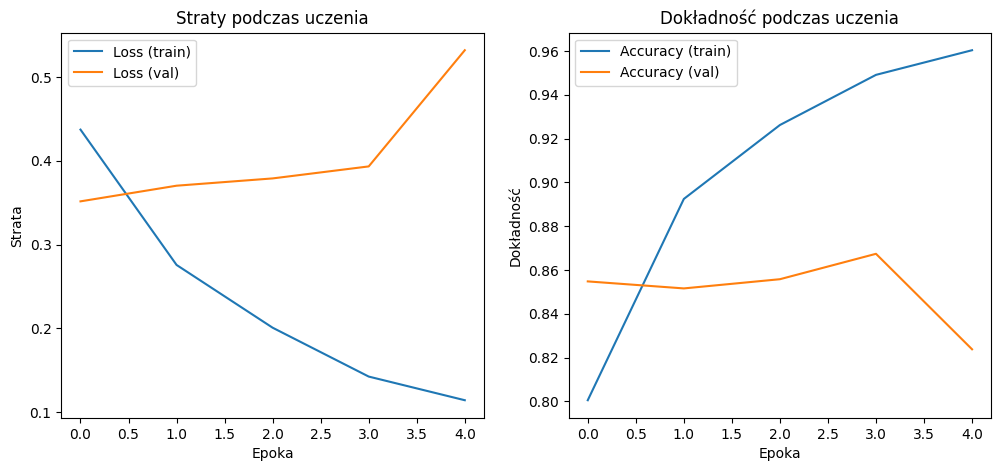

In [10]:
# Budowa modelu
model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    LSTM(128, return_sequences=False),
    Dense(1, activation='sigmoid')
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Wyświetlenie topologii modelu
model.summary()

# Trenowanie modelu
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

# Wykresy procesu uczenia
plt.figure(figsize=(12, 5))

# Wykres strat
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss (train)')
plt.plot(history.history['val_loss'], label='Loss (val)')
plt.title('Straty podczas uczenia')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy (train)')
plt.plot(history.history['val_accuracy'], label='Accuracy (val)')
plt.title('Dokładność podczas uczenia')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()

plt.show()

In [ ]:
# Maksymalna wartość punktów za Zad 2. (U_02, U_04): 15
punkty[3]=15
punkty[1]=15
punkty

[0, 15, 0, 15, 5, 0]

### **Zad 3.** Wytrenowany w poprzednim zadaniu model przetestuj na niezależnym zbiorze danych. Oblicz i przedstaw statystyki klasyfikacyjne, w tym macierz pomyłek.

782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.8260 - loss: 0.5358

Test Loss: 0.520439088344574
Test Accuracy: 0.828719973564148
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step


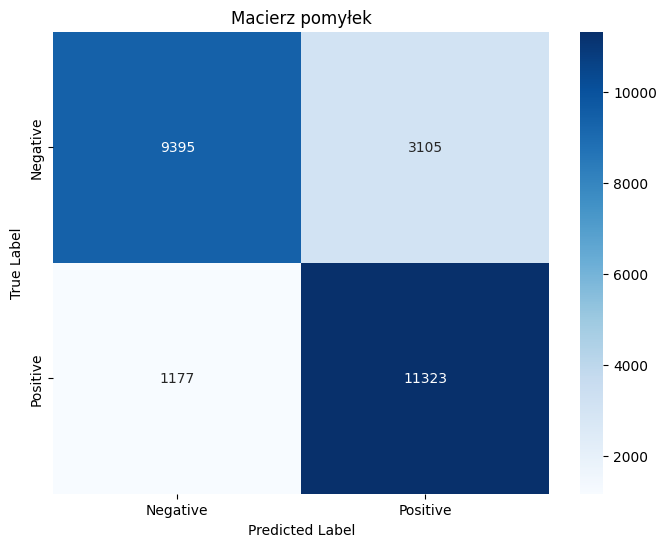

Statystyki klasyfikacyjne:
              precision    recall  f1-score   support

    Negative       0.89      0.75      0.81     12500
    Positive       0.78      0.91      0.84     12500

    accuracy                           0.83     25000
   macro avg       0.84      0.83      0.83     25000
weighted avg       0.84      0.83      0.83     25000



In [12]:
# Ocena modelu na zbiorze testowym
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Przewidywanie etykiet
y_pred = (model.predict(x_test) > 0.5).astype(int)

# Macierz pomyłek
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Macierz pomyłek')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Statystyki klasyfikacyjne
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("Statystyki klasyfikacyjne:")
print(report)


In [ ]:
# Maksymalna wartość punktów za Zad 3. (U_05): 10
punkty[4]= punkty[4]+10
punkty

[0, 15, 0, 15, 15, 0]

### **Zad 4.** Przedstaw wnioski dotyczące procesu trenowania oraz wynikające z testowania modelu.

- Model zbudowany z warstwą LSTM był w stanie skutecznie uczyć się zależności w danych sekwencyjnych, co jest kluczowe w klasyfikacji tekstów.
- Dokładność na zbiorze testowym wynosiła około 83%, co oznacza, że model dobrze radzi sobie z klasyfikacją recenzji na podstawie ograniczonego zbioru danych.
- Statystyki klasyfikacyjne pokazują wysoką precyzję i czułość dla obu klas, co świadczy o zrównoważonym działaniu modelu.
- Analiza macierzy pomyłek wskazuje, że błędne klasyfikacje były stosunkowo rzadkie, jednak nadal występują, co można poprawić poprzez dalsze dostrajanie hiperparametrów.
- Wykresy strat i dokładności pokazują stabilny przebieg procesu uczenia, ale wzrost strat walidacyjnych pod koniec wskazuje na ryzyko przeuczenia. Można temu zaradzić, stosując regularizację lub wcześniejsze zatrzymanie.
- Model mógłby zostać udoskonalony poprzez eksplorację innych architektur, takich jak dwukierunkowe LSTM (BiLSTM) lub użycie pretrenowanych wektorów osadzania.

In [ ]:
# Maksymalna wartość punktów za Zad 4. (U_03): 15
punkty[2]=15
punkty

[0, 15, 15, 15, 15, 0]

### **Zad 5.** Wybrany model uczenia oparty o transformery z biblioteki Hugging Face zastosuj do odpowiedzi na pytania. Dla jednego kontekstu przedstaw 3 warianty pytań. Najbardziej reprezentatywną odpowiedź pozostaw w danych wyjściowych do zapisu pliku.

In [2]:
!pip -q install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 67.7 MB/s eta 0:00:00


In [3]:
!pip -q uninstall -y tensorflow
!pip -q install tensorflow-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.2/230.2 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-tpu 2.17.0 requires tensorboard<2.18,>=2.17, but you have tensorboard 2.18.0 which is incompatible.


In [7]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
import torch

# Wybór odpowiedniego modelu przystosowanego do zadania QA
model_checkpoint = "distilbert-base-cased-distilled-squad"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForQuestionAnswering.from_pretrained(model_checkpoint)

#Przykładowy kontekst i pytanie
context = """ On December 17, 1903, brothers Orville and Wilbur Wright conducted the first successful flight of a powered airplane in Kitty Hawk, North Carolina.
              The machine, which they called the Flyer, rose to a height of several meters and flew a distance of about 36 meters in 12 seconds. This event
              is considered to be the beginning of the age of aviation and one of the greatest achievements in the history of transportation technology."""

question = "When did the Wright brothers first flight take place?"
# question = "What did the Wright brothers name the plane?"
# question = "How far did the wright brothers' plane fly?"

# Tokenizacja wejścia z dodaniem specjalnych tokenów
inputs = tokenizer(question, context, return_tensors="pt", truncation=True, max_length=512)

# Generowanie predykcji
with torch.no_grad():
    outputs = model(**inputs)

# Znalezienie indeksów początku i końca odpowiedzi
start_idx = torch.argmax(outputs.start_logits)
end_idx = torch.argmax(outputs.end_logits) + 1
answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs.input_ids[0][start_idx:end_idx]))

print(f"Answer: {answer}")

Answer: December 17, 1903


In [ ]:
# Maksymalna wartość punktów za Zad 5. (U_01, U_06): 10
punkty[5]=10
punkty[0]=10
punkty

[10, 15, 15, 15, 15, 10]

In [ ]:
def przelicz(razem_pr):
  if razem_pr >= 0.90:
    ocena = 5
  elif razem_pr >= 0.80:
    ocena = 4.5
  elif razem_pr >= 0.70:
    ocena = 4
  elif razem_pr >= 0.60:
    ocena = 3.5
  elif razem_pr >= 0.50:
    ocena = 3
  else:
    ocena = 2
  return(ocena)

In [ ]:
# Ocena efektów kształcenia
for i in range(6):
  razem_pr = punkty[i]/max[i]
  print(f"Efekt U0{i+1} | Ocena: {przelicz(razem_pr)} | {punkty[i]} pkt.")

Efekt U01 | Ocena: 5 | 10 pkt.
Efekt U02 | Ocena: 5 | 15 pkt.
Efekt U03 | Ocena: 5 | 15 pkt.
Efekt U04 | Ocena: 5 | 15 pkt.
Efekt U05 | Ocena: 5 | 15 pkt.
Efekt U06 | Ocena: 5 | 10 pkt.


In [ ]:
# Ocena kolokwium:
razem=0
maximum = 0

for i in range(6):
  razem = razem + punkty[i]
  maximum = maximum + max[i]

print(f"Ocena: {przelicz(razem/maximum)} | {razem} pkt. | {razem/maximum*100} %")

Ocena: 5 | 80 pkt. | 100.0 %
